# Klasifikasi Dataset CIFAR 10 (Model CNN)

**Contoh Deloyment untuk Domain Computer Vision (CV)** <br>
Orbit Future Academy - AI Mastery - KM Batch 4 <br>
Tim Deployment dan Tim CV<br>
2023 <br>

<img src="https://orbitfutureacademy.id/wp-content/uploads/2023/03/OFA-Logo-01.png" alt="Logo Orbit" width="100" height="30">

## Modules dan Packages

In [1]:
# pastikan versi tensorflow == 2.12.0
# jika tidak sesuai, install versi tensorflow yang sesuai
!pip show tensorflow

Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, jax, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K
import tensorflow.keras.utils
import ssl
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout,LeakyReLU
from sklearn.metrics import confusion_matrix, accuracy_score

%matplotlib inline
K.clear_session()

## Import Data

In [3]:
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [5]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

## Exploratory Data Analysis (EDA)

In [6]:
print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


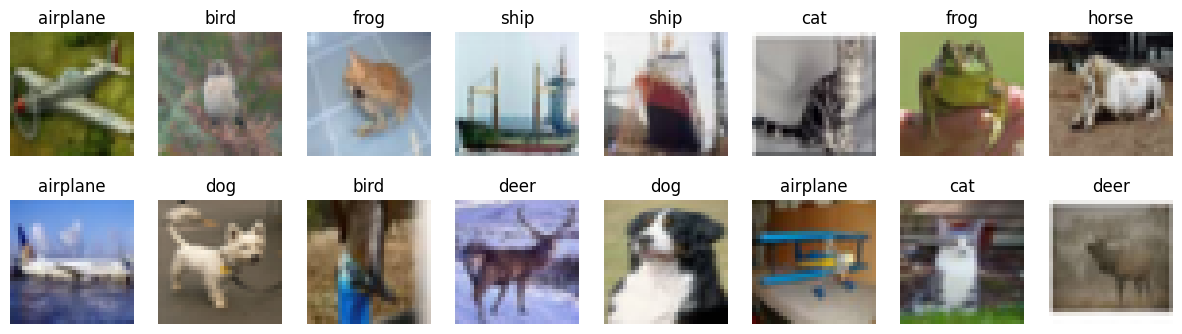

In [7]:
# Menampilkan Gambar pada Dataset Latih
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

## Menyiapkan Data

Kita akan melakukan normalisasi data input seperti berikut : $$x_{norm} = \frac{x}{255} - 0.5$$

Kita perlu melakukan konversi label kelas menjadi one-hot encoded vectors. Silahkan gunakan __keras.utils.to_categorical__.

In [8]:
# Normalisasi Input
x_train2 = (x_train / 255) - 0.5
x_test2  = (x_test / 255) - 0.5

# Mengkonversi Label Class menjadi One-Hot Encoded
y_train2 = tensorflow.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test2  = tensorflow.keras.utils.to_categorical(y_test, NUM_CLASSES)

## Membuat Arsitektur Model CNN 

In [9]:
def make_model():
    model = Sequential()
    model.add(Conv2D(16, (3, 3), input_shape=(32, 32, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

In [10]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                        

# Train model

In [11]:
INIT_LR    = 5e-3  
BATCH_SIZE = 32
EPOCHS     = 50

model = make_model() 

model.compile(
    loss      = 'categorical_crossentropy', 
    optimizer = tensorflow.keras.optimizers.Adamax(learning_rate=INIT_LR), 
    metrics   = ['accuracy'] 
)

In [12]:
%%time
model.fit(
    x_train2,
    y_train2,  
    batch_size      = BATCH_SIZE,
    epochs          = EPOCHS,
    validation_data = (x_test2, y_test2),
    shuffle         = True,
    verbose         = 1,
)

Epoch 1/50
1563/1563 [==============================] - 24s 6ms/step - loss: 1.3517 - accuracy: 0.5155 - val_loss: 1.0255 - val_accuracy: 0.6340
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9466 - accuracy: 0.6673 - val_loss: 0.8147 - val_accuracy: 0.7185
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8292 - accuracy: 0.7109 - val_loss: 0.7466 - val_accuracy: 0.7377
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7559 - accuracy: 0.7365 - val_loss: 0.7482 - val_accuracy: 0.7426
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7028 - accuracy: 0.7555 - val_loss: 0.6931 - val_accuracy: 0.7600
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6680 - accuracy: 0.7671 - val_loss: 0.6612 - val_accuracy: 0.7754
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6339 - accuracy: 0.7779 - val_loss: 0.6751 - val_accura

## Prediksi

In [13]:
# Prediksi untuk Data Latih
y_pred_train            = model.predict(x_train2)
y_pred_train_classes    = np.argmax(y_pred_train, axis=1)
y_pred_train_max_probas = np.max(y_pred_train, axis=1)

1563/1563 [==============================] - 4s 2ms/step


In [14]:
# Prediksi untuk Data Uji
y_pred_test            = model.predict(x_test2)
y_pred_test_classes    = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

313/313 [==============================] - 1s 2ms/step


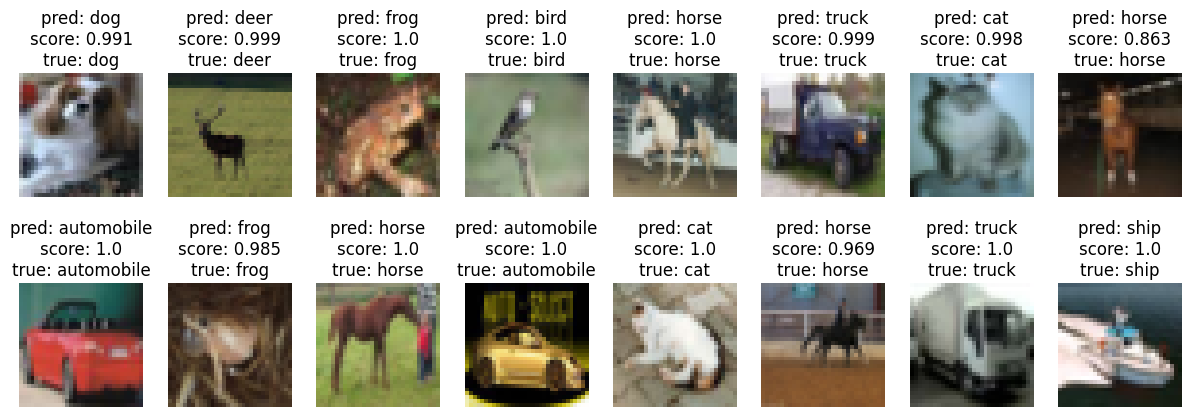

In [15]:
# Menampilkan Hasil Prediksi untuk Data Latih
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        pred_label = cifar10_classes[y_pred_train_classes[random_index]]
        pred_proba = y_pred_train_max_probas[random_index]
        true_label = cifar10_classes[y_train[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

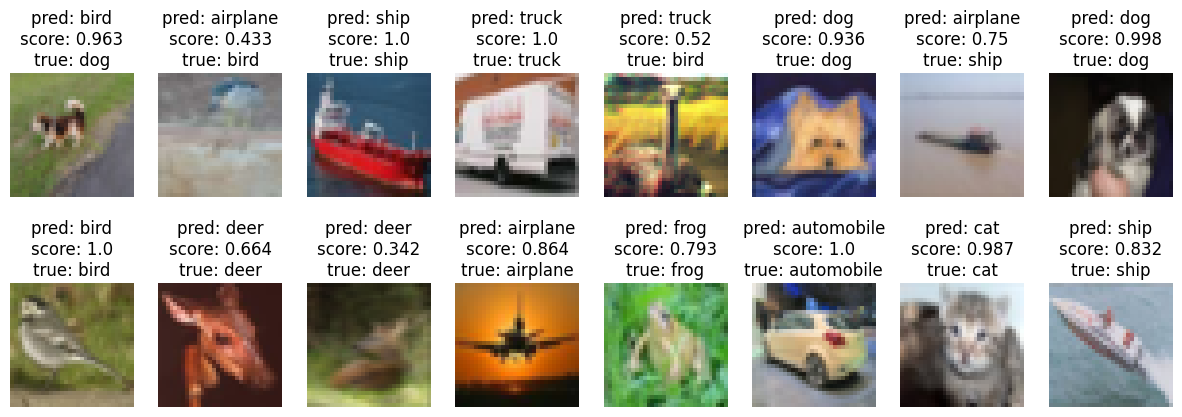

In [16]:
# Menampilkan Hasil Prediksi untuk Data Uji
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

## Evaluate model

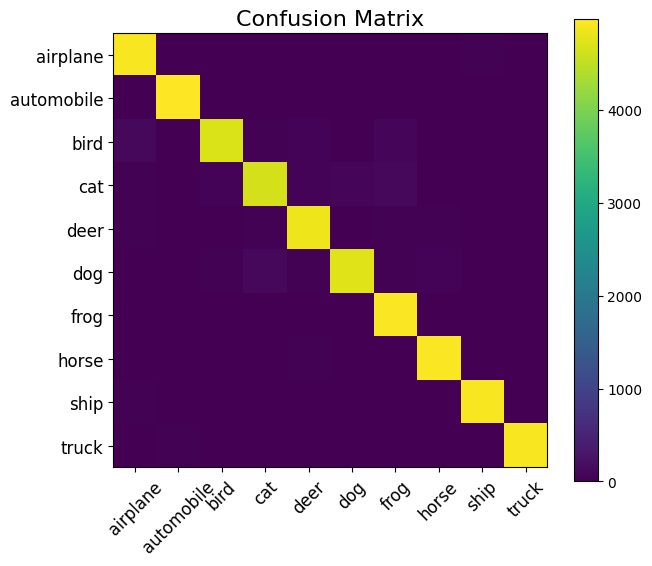

Train Accuracy: 0.97232


In [17]:
# Confusion Matrix dan Akurasi untuk Data Latih
plt.figure(figsize=(7, 6))
plt.title('Confusion Matrix', fontsize=16)
plt.imshow(confusion_matrix(y_train, y_pred_train_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()

print("Train Accuracy:", accuracy_score(y_train, y_pred_train_classes))

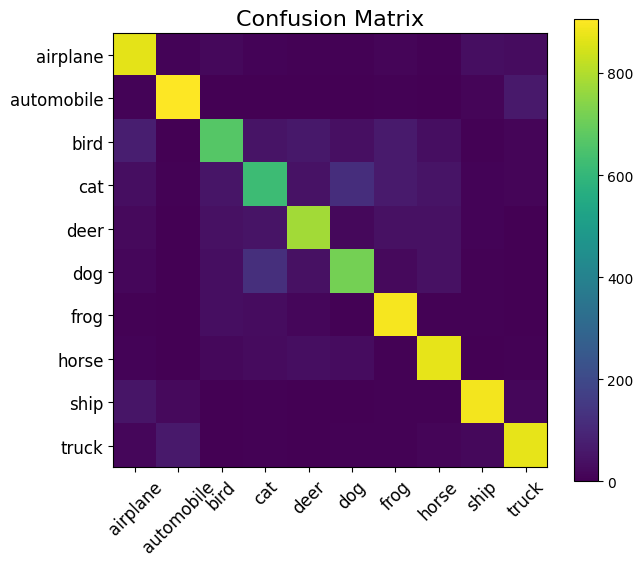

Test Accuracy: 0.8074


In [18]:
# Confusion Matrix dan Akurasi untuk Data Uji
plt.figure(figsize=(7, 6))
plt.title('Confusion Matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()

print("Test Accuracy:", accuracy_score(y_test, y_pred_test_classes))

## Menyimpan Model

In [19]:
model.save_weights("model_cifar10_cnn_tf.h5")